In [48]:
import numpy as np

def draw_axis(ax, location, orientation, darkness, axis_limits):
    # Axis Colors
    f = 1 + darkness  # Darkness should be from 0 to 1
    color = np.array([
    np.array([182, 2, 8]) / 182 / f,
    np.array([59, 114, 29]) / 114 / f,
    np.array([4, 110, 143]) / 143 / f
    ])

    # Plotting 3 vectors
    isometric = [-45, 35.264]
    for i in range(3):
        vec = orientation[:, i]
        ax.quiver(location[0], location[1], location[2], vec[0], vec[1], vec[2], linewidth=2, color=color[i, :])
        axis_limits = check_axis_limits(vec, axis_limits)

    # Viewing and Plot Settings
    ax.view_init(*isometric)
    ax.grid(True, linestyle='-', linewidth=0.25)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')



    return axis_limits

def draw_axis2(T, darkness, axis_limits=None):
    if axis_limits is None:
        axis_limits = initialize_axis_limits()

    axis_colors = [(1 - darkness, 0, 0), (0, 1 - darkness, 0), (0, 0, 1 - darkness)]

    for i, color in enumerate(axis_colors):
        start = T[:-1, -1]
        end = T[:-1, -1] + T[:-1, i]
        ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], color=color, linewidth=2)

        # Update axis_limits
        for j, coord in enumerate([start, end]):
            axis_limits = check_axis_limits(coord[0], coord[1], coord[2], axis_limits)

    return axis_limits



def initialize_axis_limits():
    return {'xmin': -0.01, 'xmax': 0.1, 'ymin': -0.01, 'ymax': 0.1, 'zmin': -0.01, 'zmax': 0.1}

def check_axis_limits(p_now, axis_limits):
    x, y, z = p_now
    if x > axis_limits['xmax']:
        axis_limits['xmax'] = x
    elif x < axis_limits['xmin']:
        axis_limits['xmin'] = x

    if y > axis_limits['ymax']:
        axis_limits['ymax'] = y
    elif y < axis_limits['ymin']:
        axis_limits['ymin'] = y

    if z > axis_limits['zmax']:
        axis_limits['zmax'] = z
    elif z < axis_limits['zmin']:
        axis_limits['zmin'] = z

    return axis_limits

def increase_axis_limits(axis_limits, inc):
    for key in axis_limits:
        axis_limits[key] *= inc
    return axis_limits

def set_axis_limits(axis_limits):
    ax.set_xlim(axis_limits['xmin'], axis_limits['xmax'])
    ax.set_ylim(axis_limits['ymin'], axis_limits['ymax'])
    ax.set_zlim(axis_limits['zmin'], axis_limits['zmax'])

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

def rotZ(angle):
    return np.array([[math.cos(angle), -math.sin(angle), 0],
                     [math.sin(angle),  math.cos(angle), 0],
                     [0,               0,                1]])
def rotY(b):
    """
    Useful for rigid-body motions.
    Takes an angle of rotation (radians) and returns the corresponding rotation matrix, about the Y axis.
    """
    rot = np.array([[np.cos(b), 0, np.sin(b)],
                    [0, 1, 0],
                    [-np.sin(b), 0, np.cos(b)]])
    return rot




## Rotation Matricies
rows or columns in A can be extracted through multiplication

Similarly, axis can be extracted and rotated with rotation matricies

a 3D rotation matrix is written as a set of three vectors where the new axis are defined by each vector, X Y Z, or expressed in terms of an angle

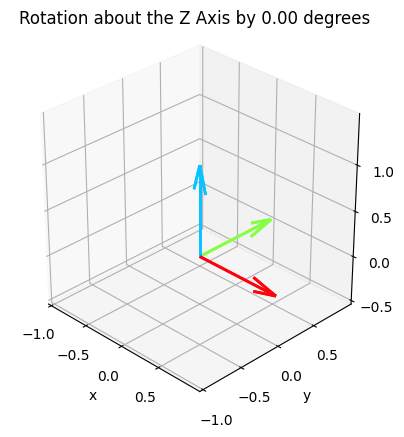

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import math

# ... (your functions here: draw_axis, draw_axis2, initialize_axis_limits, check_axis_limits, increase_axis_limits, set_axis_limits, rotZ) ...

def update_frame(i, ax, location, X, Y, Z, axis_limits, step_angle):
    angle = min(i * step_angle, end_angle)
    ax.clear()
    ax.set_box_aspect([1,1,1])
    plt.gca().set_aspect('equal', adjustable='box')

    orientation = np.dot(np.column_stack((X, Y, Z)), rotZ(angle * math.pi / 180))
    darkness = angle / end_angle / 1.15

    axis_limits = draw_axis(ax, location, np.eye(3), 0, axis_limits)
    axis_limits = draw_axis(ax, location, orientation, darkness, axis_limits)

    ax.set_title(f'Rotation about the Z Axis by {angle:.2f} degrees')

    # Set axes limits
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-.5, 1.5])

    ax.grid(True, linestyle='-', linewidth=0.25)

    # Adjust the viewing angle
    ax.view_init(elev=30, azim=-45)

    # Set the tick marks for each axis
    ax.set_xticks(np.arange(-1, 1, 0.5))
    ax.set_yticks(np.arange(-1, 1, 0.5))
    ax.set_zticks(np.arange(-.5, 1.5, 0.5))

X = np.array([1, 0, 0]).T
Y = np.array([0, 1, 0]).T
Z = np.array([0, 0, 1]).T
location = np.array([0, 0, 0])

axis_limits = initialize_axis_limits()
end_angle = 360
step_angle = 8.0
num_steps = int(np.ceil(end_angle / step_angle))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ani = animation.FuncAnimation(fig, update_frame, frames=num_steps + 1, fargs=(ax, location, X, Y, Z, axis_limits, step_angle), interval=100)

FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='3D Axis Rotation', artist='Matplotlib')
writer = FFMpegWriter(fps=15, metadata=metadata)
ani.save('3d_axis_rotation.mp4', writer=writer)

# plt.show() to show the static end figure

from IPython.display import Video
Video("3d_axis_rotation.mp4")


## Transformation Matricies
the 3 by 3 rotation matrix can be adapted to a 4x4 to include position information

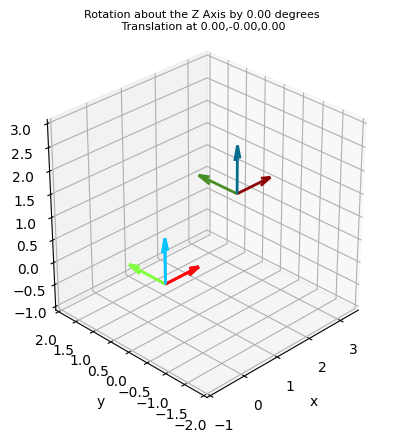

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import math

# ... (your functions here: draw_axis, draw_axis2, initialize_axis_limits, check_axis_limits, increase_axis_limits, set_axis_limits, rotZ) ...

def update_frame(i, ax, location_start, location_end, X, Y, Z, axis_limits, step_angle):
    angle = min(i * step_angle, end_angle)
    ax.clear()
    ax.set_box_aspect([1,1,1])
    plt.gca().set_aspect('equal', adjustable='box')

    orientation = np.dot(np.column_stack((X, Y, Z)), rotZ(angle * math.pi / 180))
    darkness = angle / end_angle / 1.15
    location_progress = angle / end_angle * location_end

    axis_limits = draw_axis(ax, location_start, np.eye(3), 0, axis_limits)
    draw_axis(ax, location_end, np.dot(np.column_stack((X, Y, Z)), rotZ(end_angle * math.pi / 180)), 0.8, axis_limits)
    axis_limits = draw_axis(ax, location_progress, orientation, darkness, axis_limits)

    ax.set_title(f'Rotation about the Z Axis by {angle:.2f} degrees\n Translation at {location_progress[0]:.2f},{location_progress[1]:.2f},{location_progress[2]:.2f}', fontsize=8)
    
    ax.set_xlim([-1, 3.5])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-1, 3])

    ax.grid(True, linestyle='-', linewidth=0.25)

    # Adjust the viewing angle
    ax.view_init(elev=30, azim=225)

X = np.array([1, 0, 0]).T
Y = np.array([0, 1, 0]).T
Z = np.array([0, 0, 1]).T
location_start = np.array([0, 0, 0])
location_end = np.array([1, -1, 2])

axis_limits = initialize_axis_limits()
end_angle = 360
step_angle = 8.0
num_steps = int(np.ceil(end_angle / step_angle))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ani = animation.FuncAnimation(fig, update_frame, frames=num_steps + 1, fargs=(ax, location_start, location_end, X, Y, Z, axis_limits, step_angle), interval=100)

FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='3D Axis Rotation and Translation', artist='Matplotlib')
writer = FFMpegWriter(fps=15, metadata=metadata)
ani.save('TransformationMatrixAnimation.mp4', writer=writer)

# plt.show() to show the static end figure

from IPython.display import Video
Video("TransformationMatrixAnimation.mp4")


## Lets Show off a little

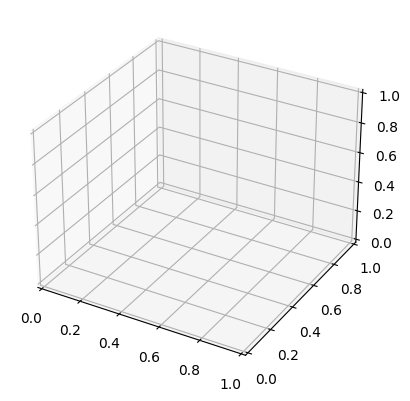

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import math

# ... (your functions here: draw_axis2, rotX, rotY, rotZ) ...

end_angle = -90
step_angle = 5
num_steps = int(np.abs(end_angle / step_angle)) + 1
total_steps = 4 * num_steps

p = np.array([0, 0, 0])
R = np.eye(3)
Tstart = np.vstack((np.column_stack((R, p)), [0, 0, 0, 1]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def update_frame(i, ax, Tstart, end_angle, num_steps):
    ax.clear()
    ax.set_box_aspect([1, 1, 1])  # Added to maintain aspect ratio
    plt.gca().set_aspect('equal', adjustable='box')  # Added to maintain aspect ratio

    if i < num_steps:
        angle = i * end_angle / (num_steps - 1)
        Rcurrent = rotY(angle * math.pi / 180)
    elif i < 2 * num_steps:
        angle = (i - num_steps) * end_angle / (num_steps - 1)
        Rcurrent = rotZ(angle * math.pi / 180)
    elif i < 3 * num_steps:
        angle = (i - 2 * num_steps) * end_angle / (num_steps - 1)
        Rcurrent = rotX(angle * math.pi / 180)
    else:
        angle = (i - 3 * num_steps) * end_angle / (num_steps - 1)
        Rcurrent = rotY(angle * math.pi / 180)

    Tlast_to_now = np.vstack((np.column_stack((Rcurrent, [0, 0, 0])), [0, 0, 0, 1]))
    Tnow = np.dot(Tstart, Tlast_to_now)
    darkness = angle / end_angle / 1.15
    draw_axis2(Tnow, darkness)

    ax.set_title(f'Rotation about the {"Y" if i < num_steps else "Z" if i < 2 * num_steps else "X" if i < 3 * num_steps else "Y"} Axis by {angle:.2f} degrees')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-0.1, 1])

ani = animation.FuncAnimation(fig, update_frame, frames=total_steps + 1, fargs=(ax, Tstart, end_angle, num_steps), interval=100, repeat=False)

plt.show()
